* [navalplantmaintenance.csv] : https://www.kaggle.com/elikplim/maintenance-of-naval-propulsion-plants-data-set

#Part4. [실습9] 가스 터빈 추진 플랜트 제조 공정의 부식 예측

* matplotlib 한글 깨짐 현상 해결
> 셀 실행 후 런타임 재시작 필요

In [ ]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

# import matplotlib.font_manager as fm
# from matplotlib import pyplot as plt

# path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
# font_name = fm.FontProperties(fname=path, size=10).get_name()

# plt.rc('font', family=font_name)

# fm._rebuild()

In [ ]:
from matplotlib import pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

## 01. 데이터 소개 및 분석프로세스 수립
 : "강의자료 → Ch11. [실습9] 가스 터빈 추진 플랜트 제조 공정의 부식 예측" 참고

## 02. 데이터 준비를 위한 EDA 및 전처리

### 0. 데이터 불러오기

In [ ]:
############################################## 00. 필요한 파이썬 라이브러리 불러오기 #####################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics

from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings("ignore")

In [ ]:
naval_df = pd.read_csv('/content/drive/MyDrive/강의/실습자료/data/ch11/navalplantmaintenance.csv', delim_whitespace=True, header=None)
naval_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


In [ ]:
naval_df.shape

(11934, 18)

### 1. 데이터 탐색

#### 1) 컬럼명 생성

In [ ]:
naval_df.columns = ['lever_position', 'ship_speed', 'gt_shaft', 'gt_rate', 'gg_rate', 'sp_torque', 'pp_torque', 'hpt_temp', 'gt_c_i_temp', 'gt_c_o_temp', 'hpt_pressure', 'gt_c_i_pressure', 'gt_c_o_pressure', 'gt_exhaust_pressure', 'turbine_inj_control', 'fuel_flow', 'gt_c_decay',  'gt_t_decay']

#### 2) 결측값

In [ ]:
100*naval_df.isna().sum()/len(naval_df)

lever_position         0.0
ship_speed             0.0
gt_shaft               0.0
gt_rate                0.0
gg_rate                0.0
sp_torque              0.0
pp_torque              0.0
hpt_temp               0.0
gt_c_i_temp            0.0
gt_c_o_temp            0.0
hpt_pressure           0.0
gt_c_i_pressure        0.0
gt_c_o_pressure        0.0
gt_exhaust_pressure    0.0
turbine_inj_control    0.0
fuel_flow              0.0
gt_c_decay             0.0
gt_t_decay             0.0
dtype: float64

In [ ]:
naval_df = naval_df.dropna()

In [ ]:
naval_df.head()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
0,1.138,3.0,289.964,1349.489,6677.380,7.584,7.584,464.006,288.0,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6.0,6960.180,1376.166,6828.469,28.204,28.204,635.401,288.0,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9.0,8379.229,1386.757,7111.811,60.358,60.358,606.002,288.0,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12.0,14724.395,1547.465,7792.630,113.774,113.774,661.471,288.0,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15.0,21636.432,1924.313,8494.777,175.306,175.306,731.494,288.0,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975


#### 3) 데이터 통계값

In [ ]:
naval_df.describe()

,lever_position,ship_speed,gt_shaft,gt_rate,gg_rate,sp_torque,pp_torque,hpt_temp,gt_c_i_temp,gt_c_o_temp,hpt_pressure,gt_c_i_pressure,gt_c_o_pressure,gt_exhaust_pressure,turbine_inj_control,fuel_flow,gt_c_decay,gt_t_decay
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.533635e-13,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


### 2. Feature 변환

#### 1) Feature 탐색

##### 총 Feature 개수 확인

In [ ]:
naval_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lever_position       11934 non-null  float64
 1   ship_speed           11934 non-null  float64
 2   gt_shaft             11934 non-null  float64
 3   gt_rate              11934 non-null  float64
 4   gg_rate              11934 non-null  float64
 5   sp_torque            11934 non-null  float64
 6   pp_torque            11934 non-null  float64
 7   hpt_temp             11934 non-null  float64
 8   gt_c_i_temp          11934 non-null  float64
 9   gt_c_o_temp          11934 non-null  float64
 10  hpt_pressure         11934 non-null  float64
 11  gt_c_i_pressure      11934 non-null  float64
 12  gt_c_o_pressure      11934 non-null  float64
 13  gt_exhaust_pressure  11934 non-null  float64
 14  turbine_inj_control  11934 non-null  float64
 15  fuel_flow            11934 non-null 

##### Feature 별 유일한 값 개수 확인

In [ ]:
[(f"{col} :", len(naval_df[col].unique())) for col in naval_df]

[('lever_position :', 9),
 ('ship_speed :', 9),
 ('gt_shaft :', 11430),
 ('gt_rate :', 3888),
 ('gg_rate :', 11834),
 ('sp_torque :', 4286),
 ('pp_torque :', 4286),
 ('hpt_temp :', 11772),
 ('gt_c_i_temp :', 1),
 ('gt_c_o_temp :', 11506),
 ('hpt_pressure :', 524),
 ('gt_c_i_pressure :', 1),
 ('gt_c_o_pressure :', 4209),
 ('gt_exhaust_pressure :', 19),
 ('turbine_inj_control :', 8496),
 ('fuel_flow :', 696),
 ('gt_c_decay :', 51),
 ('gt_t_decay :', 26)]

In [ ]:
print(naval_df.nunique().sort_values())

gt_c_i_temp                1
gt_c_i_pressure            1
lever_position             9
ship_speed                 9
gt_exhaust_pressure       19
gt_t_decay                26
gt_c_decay                51
hpt_pressure             524
fuel_flow                696
gt_rate                 3888
gt_c_o_pressure         4209
sp_torque               4286
pp_torque               4286
turbine_inj_control     8496
gt_shaft               11430
gt_c_o_temp            11506
hpt_temp               11772
gg_rate                11834
dtype: int64


##### Feature 제거

In [ ]:
# we can drop gt_c_i_pressure and gt_c_i_temp as they have only 1 unique value, and thus not conributing to our dataset
naval_df = naval_df.drop(['gt_c_i_pressure', 'gt_c_i_temp'], axis=1)

### 3. Target Feature 정의

#### 1) 데이터 확인

In [ ]:
naval_df.gt_c_decay.unique()

array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
       0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
       0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
       0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
       0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
       0.995, 0.996, 0.997, 0.998, 0.999, 1.   ])

In [ ]:
naval_df.gt_t_decay.unique()

array([0.975, 0.976, 0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983,
       0.984, 0.985, 0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992,
       0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.   ])

#### 2) 그래프

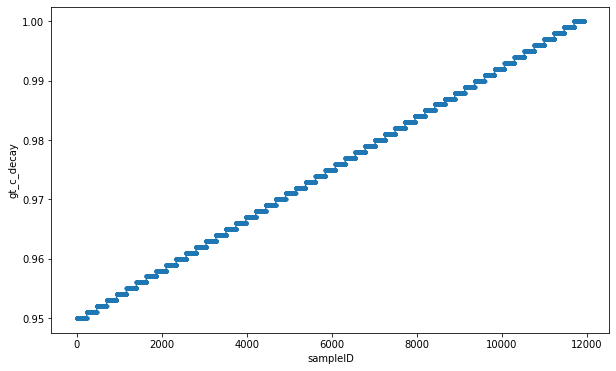

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(naval_df.index, naval_df.gt_c_decay,'.-')
plt.xlabel("sampleID")
plt.ylabel("gt_c_decay")
plt.show()

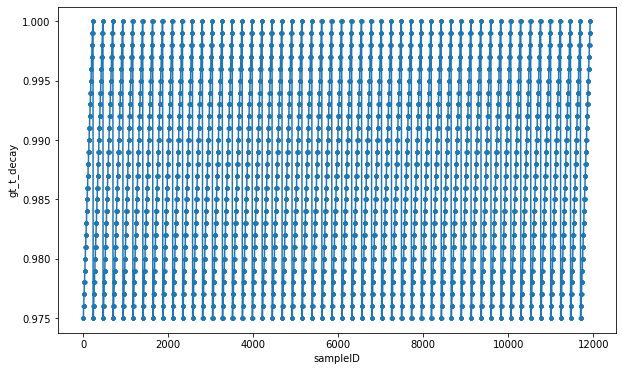

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(naval_df.index, naval_df.gt_t_decay,'.-')
plt.xlabel("sampleID")
plt.ylabel("gt_t_decay")
plt.show()

### 4. Feature 정제

#### 1) 분포 및 이상치 확인

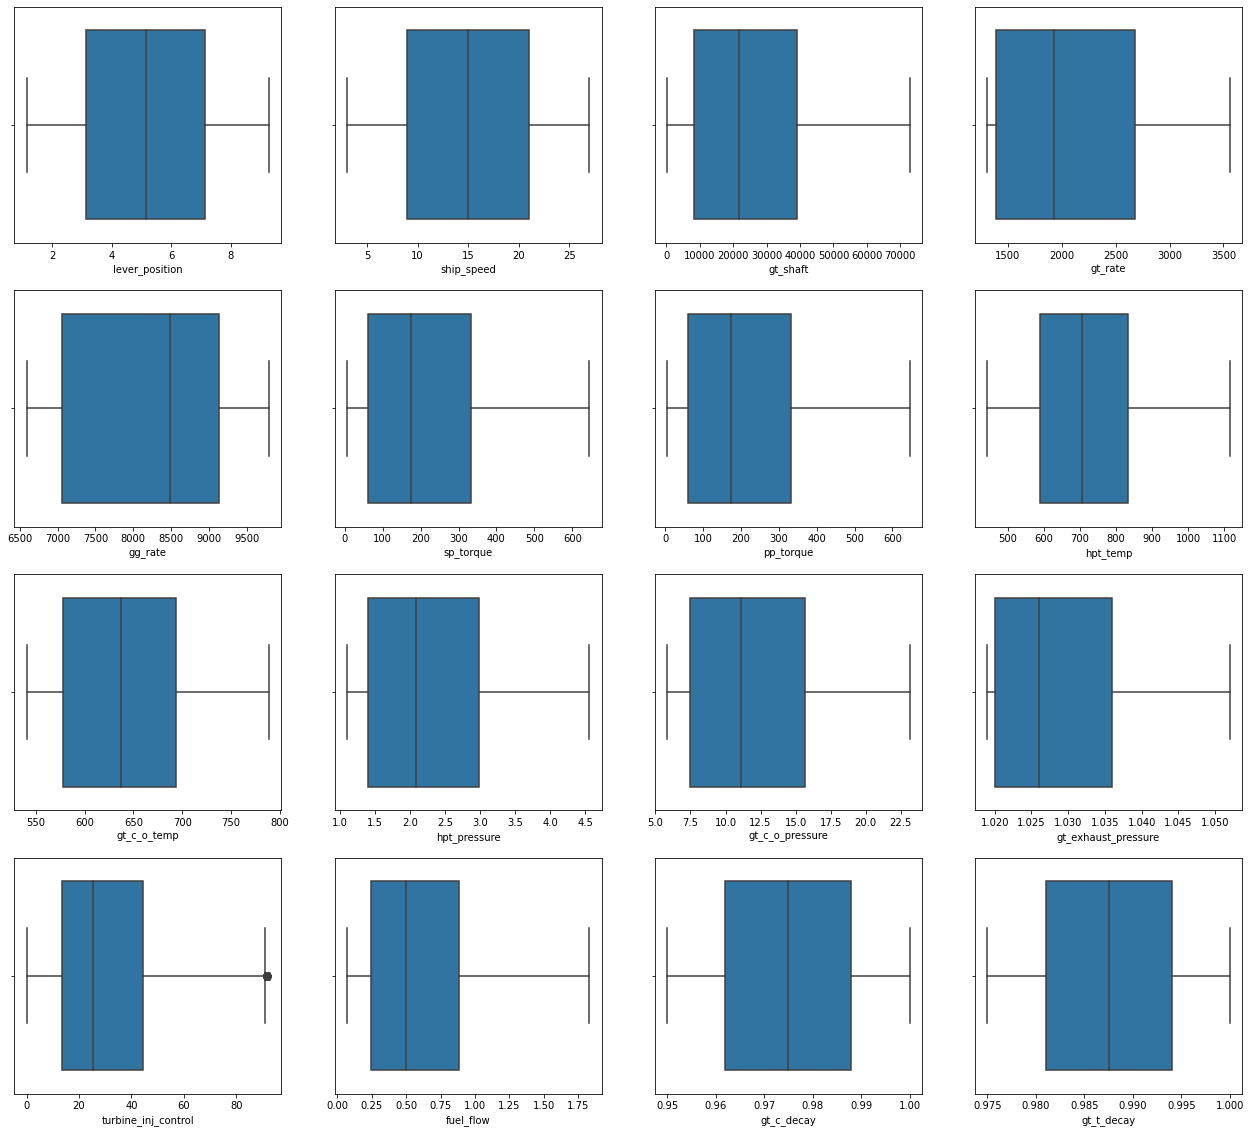

In [ ]:
plt.figure(figsize=(22, 20))
icount =1
for col in naval_df.columns:
    plt.subplot(4,4, icount)
    sns.boxplot(naval_df[col], orient="v")
    icount = icount+1
plt.show()

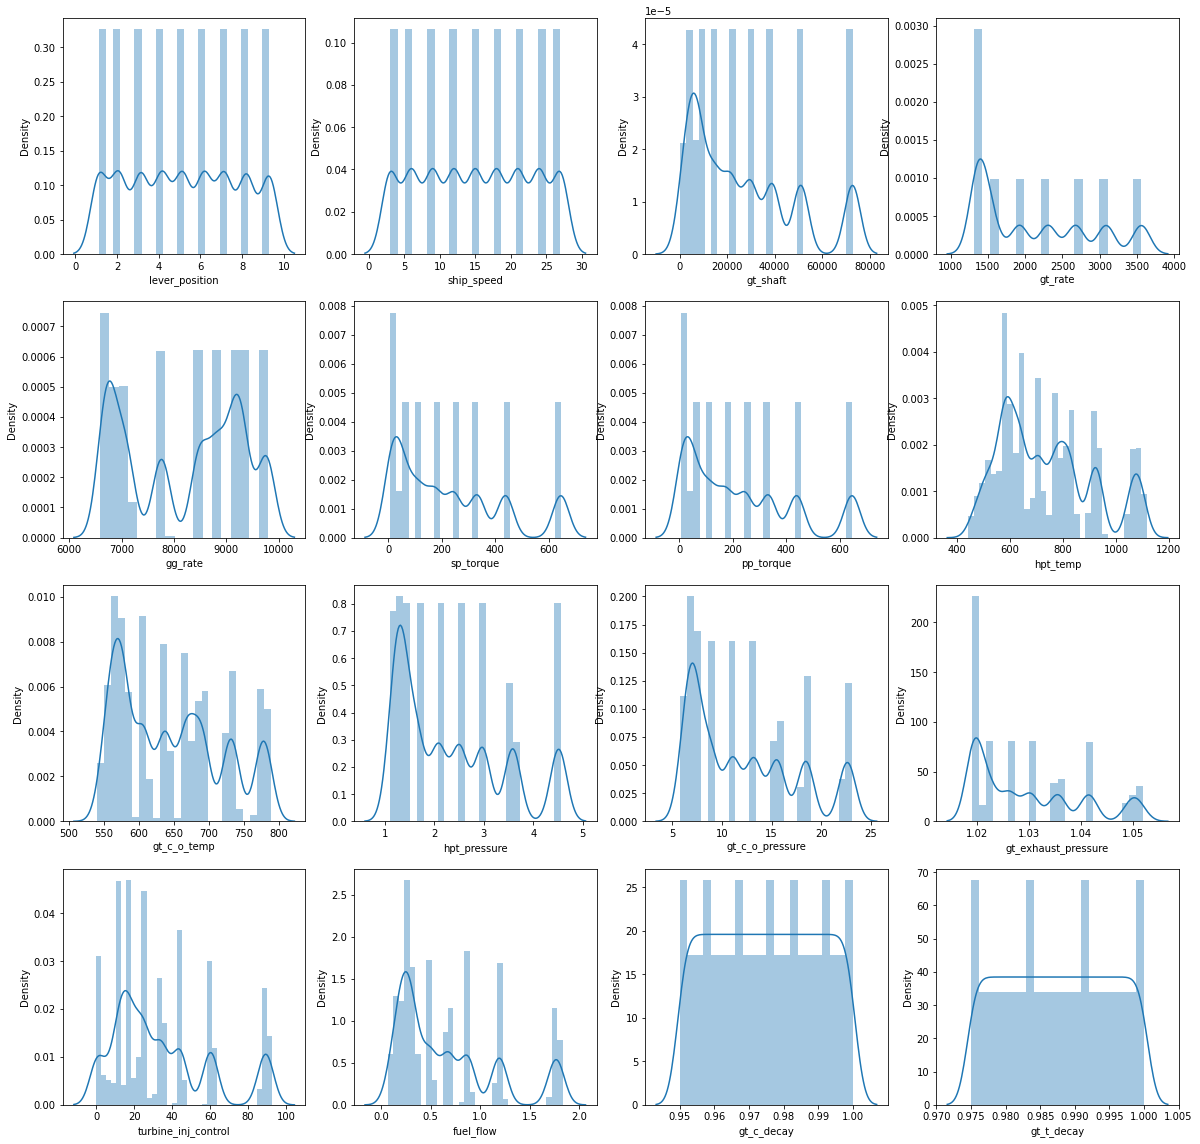

In [ ]:
plt.figure(figsize=(20,20))
icount =1
for col in naval_df.columns:
    plt.subplot(4,4, icount)
    sns.distplot(naval_df[col])
    icount +=1
plt.show()

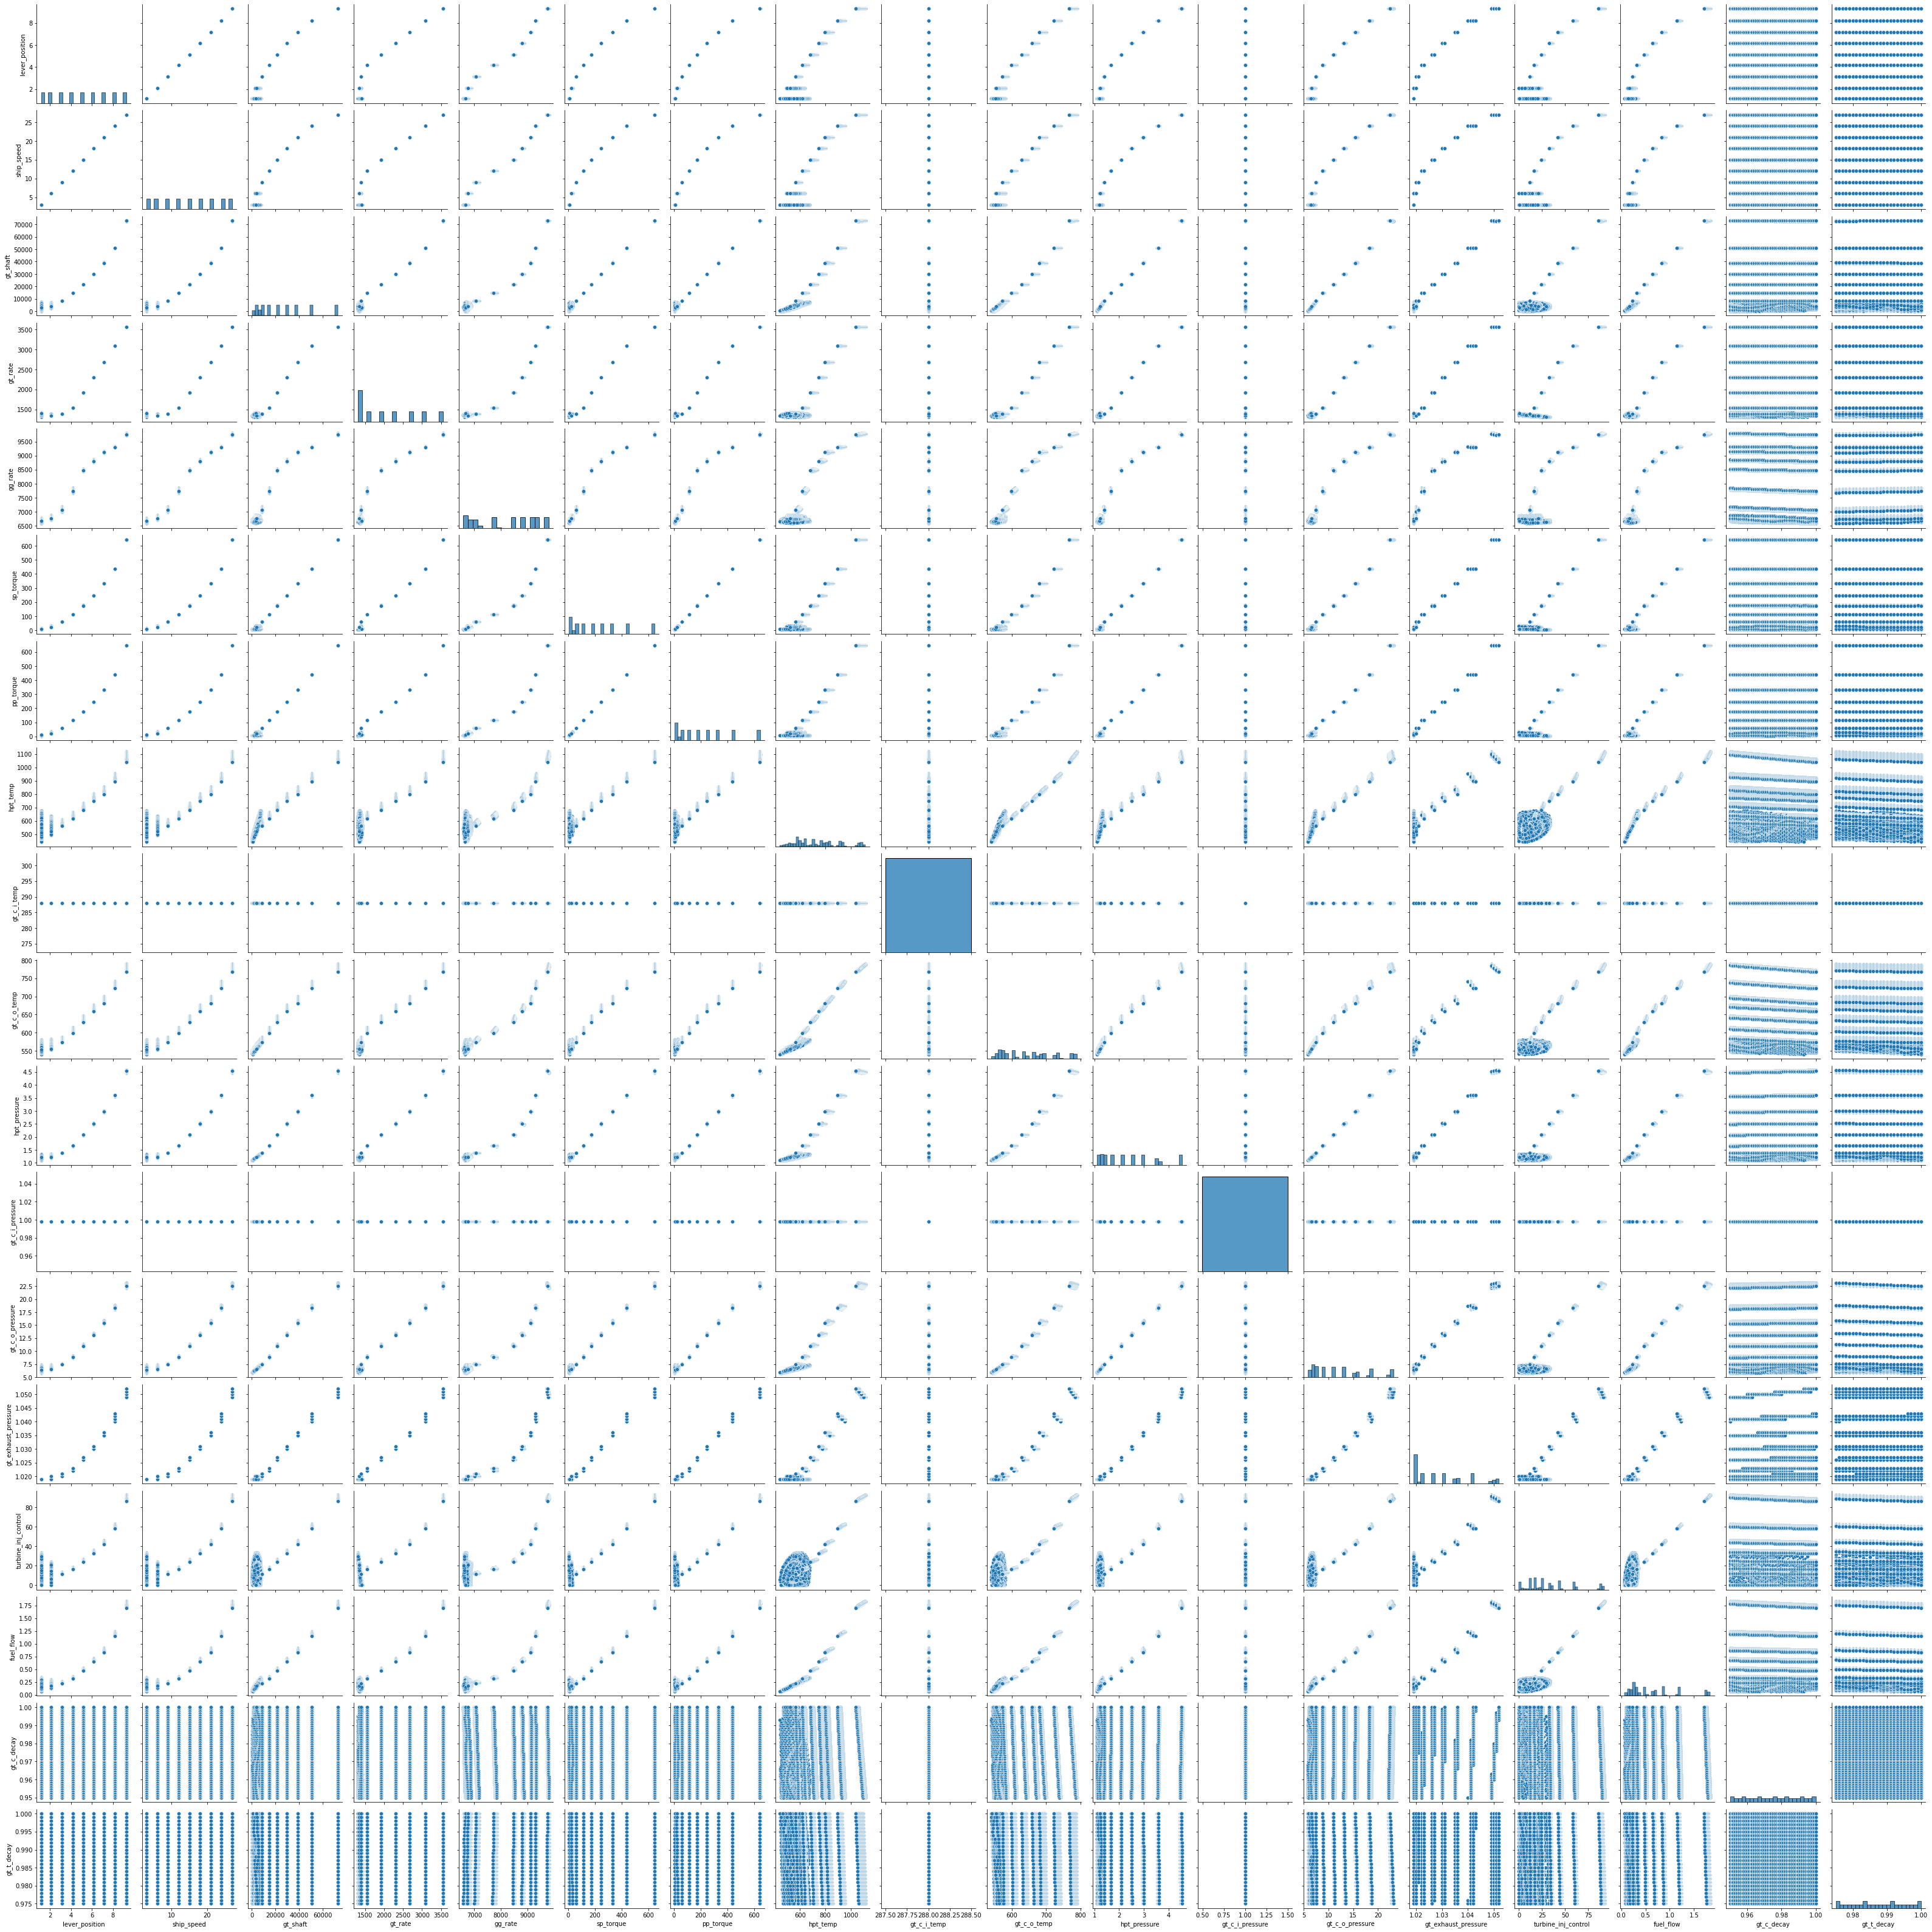

In [ ]:
sns.pairplot(naval_df)
plt.show()

#### 2) 상관성 확인

##### 선형성

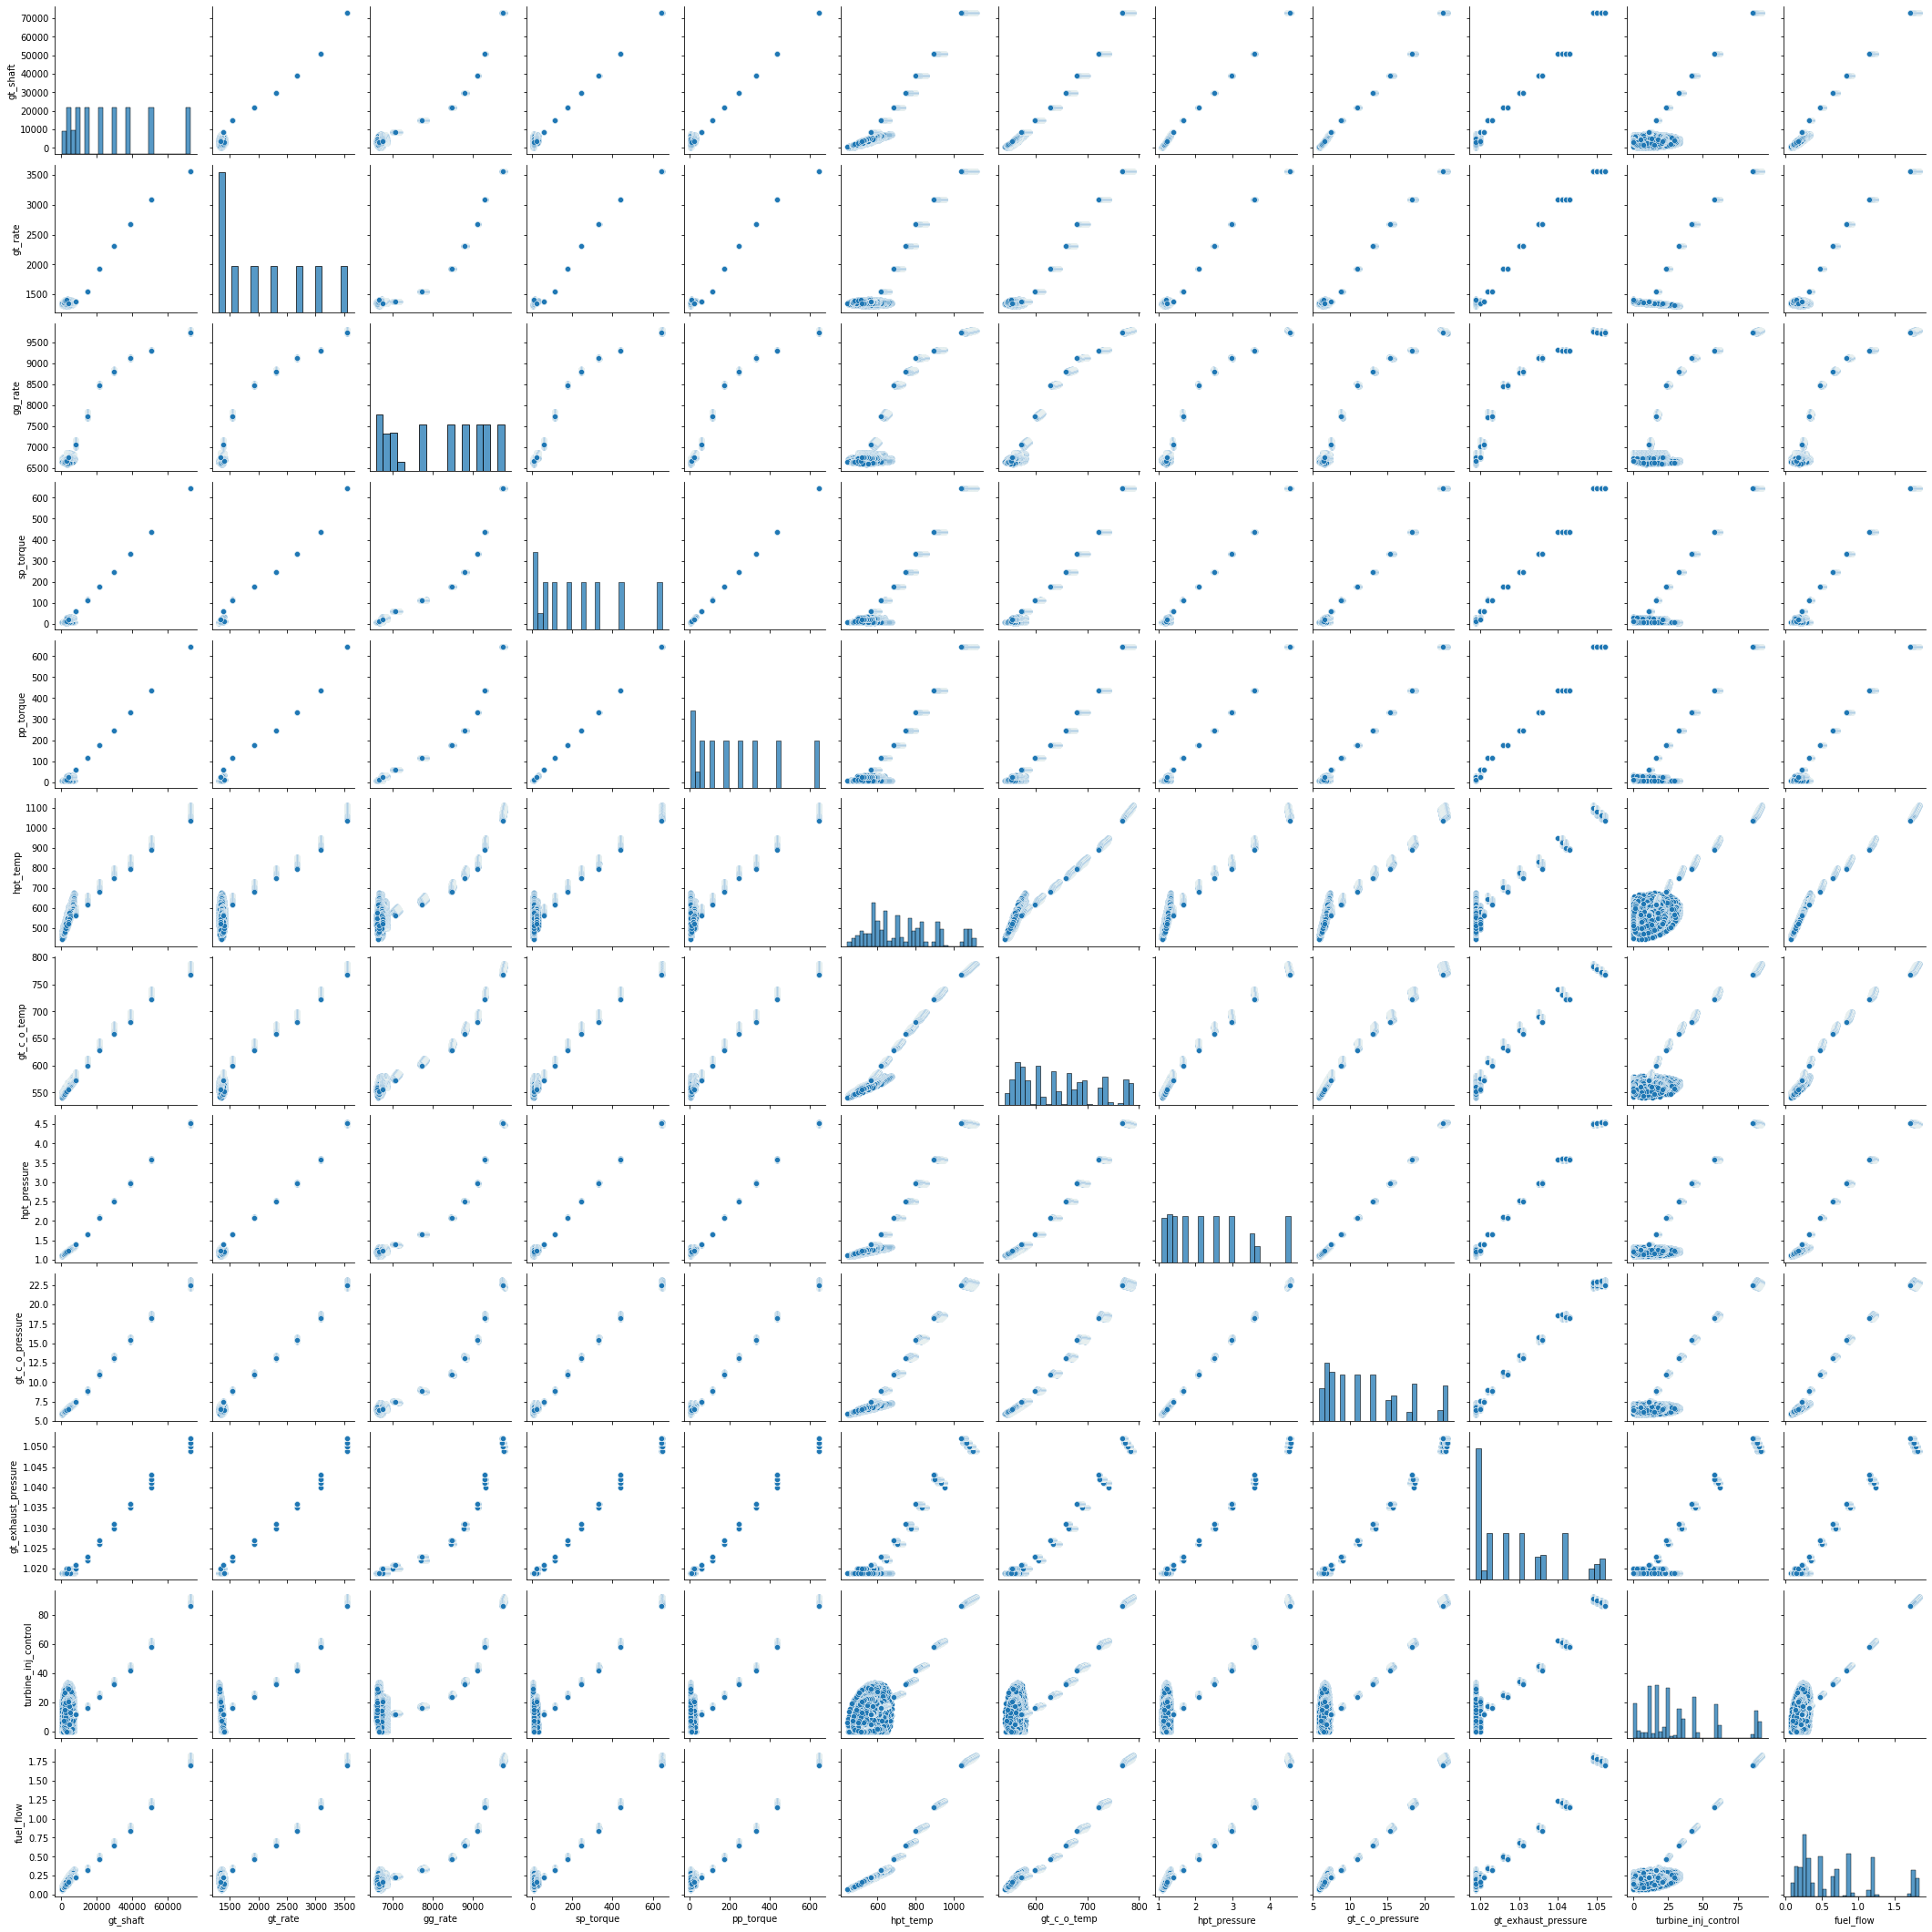

In [ ]:
sns.pairplot(naval_df[naval_df.columns[2:-2]])
plt.show()

##### 상관계수

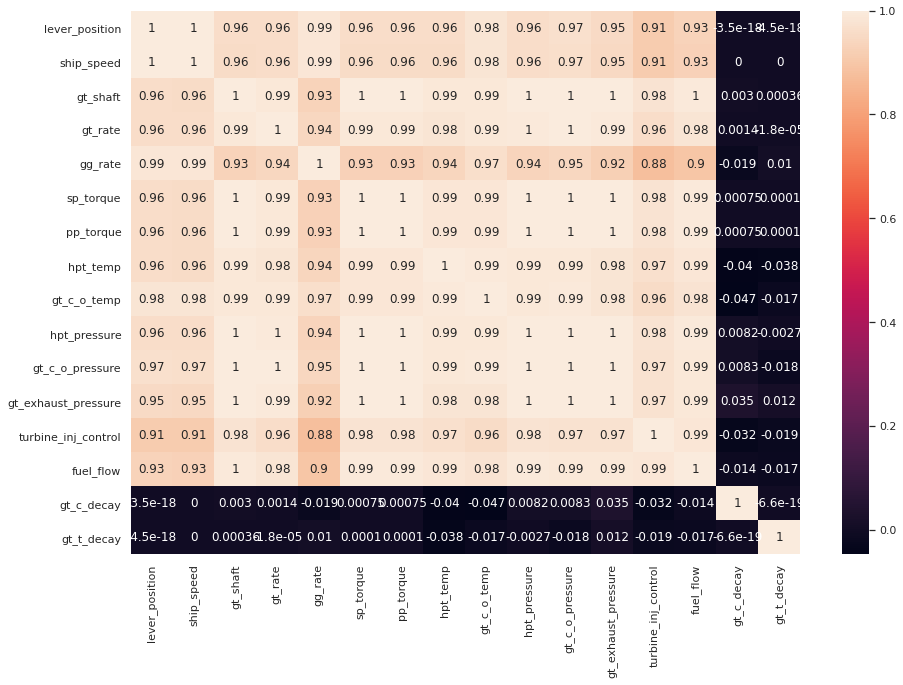

In [ ]:
plt.figure(figsize=(15,10))
cols = naval_df.corr().index
corr_mat = np.corrcoef(naval_df[cols].values.T)
sns.set(font_scale =1)
hm = sns.heatmap(corr_mat, annot=True, yticklabels = cols.values, xticklabels=cols.values)
plt.show()

### 5. PCA 를 활용한 Feature Selection

#### 1) 데이터 준비

In [ ]:
np.random.seed(0)
df_train_navel, df_test_navel = train_test_split(naval_df, train_size = 0.7, test_size=0.3, random_state = 100)

In [ ]:
y_train_c = df_train_navel.pop('gt_c_decay')
y_train_t = df_train_navel.pop('gt_t_decay')
X_train = df_train_navel


y_test_c = df_test_navel.pop('gt_c_decay')
y_test_t = df_test_navel.pop('gt_t_decay')
X_test = df_test_navel

In [ ]:
X_train.shape

(8353, 14)

In [ ]:
tr_scaled_features = StandardScaler().fit_transform(X_train.values)
X_train = pd.DataFrame(tr_scaled_features, index=X_train.index, columns=X_train.columns)

tt_scaled_features = StandardScaler().fit_transform(X_test.values)
X_test = pd.DataFrame(tt_scaled_features, index=X_test.index, columns=X_test.columns)

#### 2) PCA 적용

> PCA 모델링 순서
* PCA.fit() : 주성분 탐색
* PCA.transform() : 새로운 주성분으로 데이터 변환

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 14 artists>

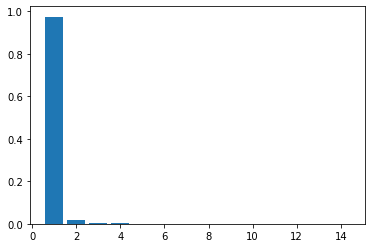

In [ ]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

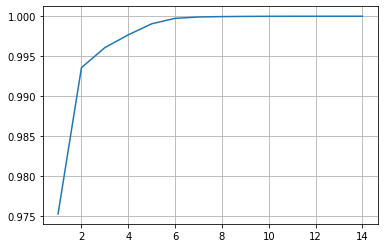

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.grid()

In [ ]:
print("no. of Components  Variance accounted")
for i in range (2, 8):
    s = ("      " + str(i)+ "             "+ str(100*var_cumu[i]));
    print(s)

no. of Components  Variance accounted
      2             99.6077302196102
      3             99.76745921533721
      4             99.90539613345479
      5             99.97368400447967
      6             99.99060052819466
      7             99.99563788531059


In [ ]:
pca.components_

array([[ 2.64204166e-01,  2.63652076e-01,  2.69902735e-01,
         2.68774489e-01,  2.58251061e-01,  2.69543445e-01,
         2.69543445e-01,  2.68376076e-01,  2.69778171e-01,
         2.70114563e-01,  2.70338277e-01,  2.68890088e-01,
         2.62917871e-01,  2.67052903e-01],
       [-4.08284739e-01, -4.26612662e-01,  1.25532599e-01,
         3.67851158e-02, -5.63574495e-01,  1.36664645e-01,
         1.36664645e-01,  5.65749624e-02, -1.02976754e-01,
         1.01982320e-01,  4.94412302e-02,  1.55069649e-01,
         3.64422067e-01,  3.09391600e-01],
       [ 8.30770891e-02,  7.49766227e-02, -4.19840847e-02,
        -4.39271161e-01,  9.91862695e-02, -1.17511089e-01,
        -1.17511089e-01,  3.97594241e-01,  9.58061269e-02,
        -1.68690991e-01, -1.48255451e-01, -3.75717909e-01,
         6.27249921e-01,  5.47405193e-02],
       [-2.92064851e-01, -2.96606947e-01,  3.19730255e-02,
         1.08898605e-01,  1.51017586e-01, -1.49236352e-01,
        -1.49236352e-01,  6.34044002e-01,  2.

In [ ]:
# numpy.argmax : 다차원 배열에서 차원에 따라 가장 큰 값의 인덱스들을 반환하는 함수

def getPCAMostImportantFeat(model, initial_feature_names):
    # 총 component 개수
    n_pcs= model.components_.shape[0]

    # 각 component 의 중요도 값들 중 가장 큰 값의 인덱스를 반환
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

    # 컬럼명 중 위에서 구한 인덱스들에 해당하는 것들만 반환
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # 인덱스 번호와 해당 컬럼명으로 dictionary 생성
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    df = pd.DataFrame(dic.items())
    return df

In [ ]:
pca_grid_df = getPCAMostImportantFeat(pca,X_train.columns)
pca_grid_df

,0,1
0,PC0,gt_c_o_pressure
1,PC1,gg_rate
2,PC2,turbine_inj_control
3,PC3,hpt_temp
4,PC4,gt_rate
5,PC5,gg_rate
6,PC6,gt_c_o_temp
7,PC7,gt_c_o_temp
8,PC8,gt_c_o_pressure
9,PC9,gt_shaft


> PCA (n_components=4)

In [ ]:
# PCA
pca_4_cpnt = PCA(n_components=4, random_state=42)

In [ ]:
# fitting
navel_pca_data = pca_4_cpnt.fit_transform(X_train)

In [ ]:
cmp_lst = []
[cmp_lst.append('PC'+ str(i)) for i in range(1,5)]

[None, None, None, None]

In [ ]:
navel_pca_X = pd.DataFrame(navel_pca_data, columns=cmp_lst)
navel_pca_X

,PC1,PC2,PC3,PC4
0,-4.075176,0.338640,-0.104069,-0.271646
1,0.751580,-0.535183,-0.002603,0.045426
2,-3.218126,0.046751,0.082406,-0.084042
3,0.755436,-0.573194,0.066547,0.101727
4,-2.109785,-0.320491,0.110992,-0.066861
...,...,...,...,...
8348,7.191667,0.783968,0.232537,0.113531
8349,4.222719,-0.069220,0.015471,0.096768
8350,-3.254917,0.070804,0.052302,-0.124266
8351,2.211526,-0.468811,-0.162784,-0.059197


In [ ]:
navel_pca_X.reset_index(drop=True, inplace=True)

In [ ]:
# Transform
navel_pca_data_test = pca_4_cpnt.transform(X_test)                               
navel_pca_test_X  = pd.DataFrame(navel_pca_data_test, columns=cmp_lst)

## 다양한 Regressor 를 활용한 모델 생성과 Hypertuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

### 1. 모델 준비

In [ ]:
models = {'LinearRegression': LinearRegression(),
          'RandomForestRegressor': RandomForestRegressor(),
          'KNeighborsRegressor': KNeighborsRegressor(),
          'DecisionTreeRegressor':DecisionTreeRegressor(),
          'BaggingRegressor' : BaggingRegressor(),
          'XGBRegressor': XGBRegressor()}


params = {'LinearRegression': [{'fit_intercept':[True,False],'normalize':[True,False], 'copy_X':[True, False]}],
          'RandomForestRegressor': [{'n_estimators': [ 50, 60, 80]}],
          'KNeighborsRegressor': [{'n_neighbors': [2,3,4,5,6]}],
          'DecisionTreeRegressor': [{'max_depth': [2,4,6,8,10,12]}],        
          'BaggingRegressor': [{'base_estimator': [None, GradientBoostingRegressor(), KNeighborsRegressor()],
          'n_estimators': [20,50,100]}],
          'XGBRegressor': [{'n_estimators': [50,500]}]
         }

In [ ]:
pca_grid_df.head()

,0,1
0,PC0,gt_c_o_pressure
1,PC1,gg_rate
2,PC2,turbine_inj_control
3,PC3,hpt_temp
4,PC4,gt_rate


In [ ]:
x_pca_cols = pca_grid_df.iloc[:, 1].tolist() 

### 2. 모델 생성
> 하나의 함수로 여러 Regressor 들에 대해 GridSearchCV 적용

In [ ]:
important_features_list = []
plt.figure(figsize=(20, 12))

def runregressors(X_train, Y_train, X_test, Y_test):

    i_count = 0
    # 총 3 x 2, 6개의 그래프를 생성
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20, 15))
    
    # 각 평가 지표를 저장할 변수들 생성
    result_name = []
    result_summary1 = []
    result_mae = []
    result_mse = []
    result_exp_var = []
    result_r2_score = []
    result_ac_score = []

    for name in models.keys():

        # estimator 와 parameter 를 가져온다
        est = models[name]
        est_params = params[name]

        """
        최적 파라미터 탐색
        """
        # GridSearchCV 생성하여 fitting (cv=5)
        gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
        gscv.fit(X_train, Y_train)
        
        # 가장 좋은 성능 지표를 저장한다
        msg1 = str(gscv.best_estimator_)
        result_summary1.append(msg1)
        result_name.append(name)
        

        # 베스트 모델로 predict
        y_pred = gscv.predict(X_test)

        """
        모델 평가
        """
        ascore =gscv.best_estimator_.score( X_test, Y_test)
        
        # explained_variance_score 적용
        score = explained_variance_score(Y_test, y_pred)

        # mean_absolute_error 적용
        mae = mean_absolute_error(Y_test, y_pred)

        # mean_squared_error 적용
        mse = mean_squared_error(Y_test, y_pred)
        
        # r2_score 적용
        r2 = r2_score(Y_test, y_pred)

        msg2 = "%s: %f (%f)" % (name, score*100, mae*100)
        print(msg2)

        result_mse.append(mse)
        result_mae.append(mae)
        result_exp_var.append(score)
        result_r2_score.append(r2)
        result_ac_score.append(ascore)

        """
        Feature Importance

        RandomForestRegressor, DecisionTreeRegressor, XGBRegressor : 자체 feature_importances_ 내장
        LinearRegression : coef_
        KNeighborsRegressor : permutation_importance ---> importances_mean
        BaggingRegressor : gscv.best_estimator_ 의 feature_importances 

        """

        if name == "LinearRegression":
            # coefficient 가져오기
            important_features = pd.Series(gscv.best_estimator_.coef_ , index=x_pca_cols[:4])

        elif name == "KNeighborsRegressor":
            # permutation_importance 적용
            results = permutation_importance(gscv.best_estimator_, X_train, Y_train, scoring='neg_mean_squared_error')
            # importance
            important_features = pd.Series(results.importances_mean , index=x_pca_cols[:4])

        elif name == "BaggingRegressor":
            feature_importances = np.mean([tree.feature_importances_ for tree in gscv.best_estimator_], axis=0)
            important_features = pd.Series(feature_importances , index=x_pca_cols[:4])

        else:
            important_features = pd.Series(gscv.best_estimator_.feature_importances_ , index=x_pca_cols[:4])
        important_features_list.append(important_features)

        col = i_count%2
        row = i_count//2
        ax[row][col].scatter(Y_test, y_pred)
        ax[row][col].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
        ax[row][col].set_xlabel('실제값')
        ax[row][col].set_ylabel('예측값')
        ax[row][col].set_title(msg2)
        i_count+=1
            
    plt.show()

    
    result_summary_list = pd.DataFrame({'name': result_name,
                                        'best_estimator': result_summary1,
                                        'R2': result_r2_score,
                                        'MAE': result_mae,
                                        'MSE': result_mse,
                                        'explained variance score': result_exp_var,
                                        'accuracy': result_ac_score})
    return result_summary_list

<Figure size 1440x864 with 0 Axes>

### 컴프레서 부식 예측

LinearRegression: 15.677569 (1.151880)
RandomForestRegressor: 86.626085 (0.487281)
KNeighborsRegressor: 92.145916 (0.471307)
DecisionTreeRegressor: 70.312818 (0.572079)
BaggingRegressor: 87.464202 (0.481129)
[01:19:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:56] WARNING: /workspace

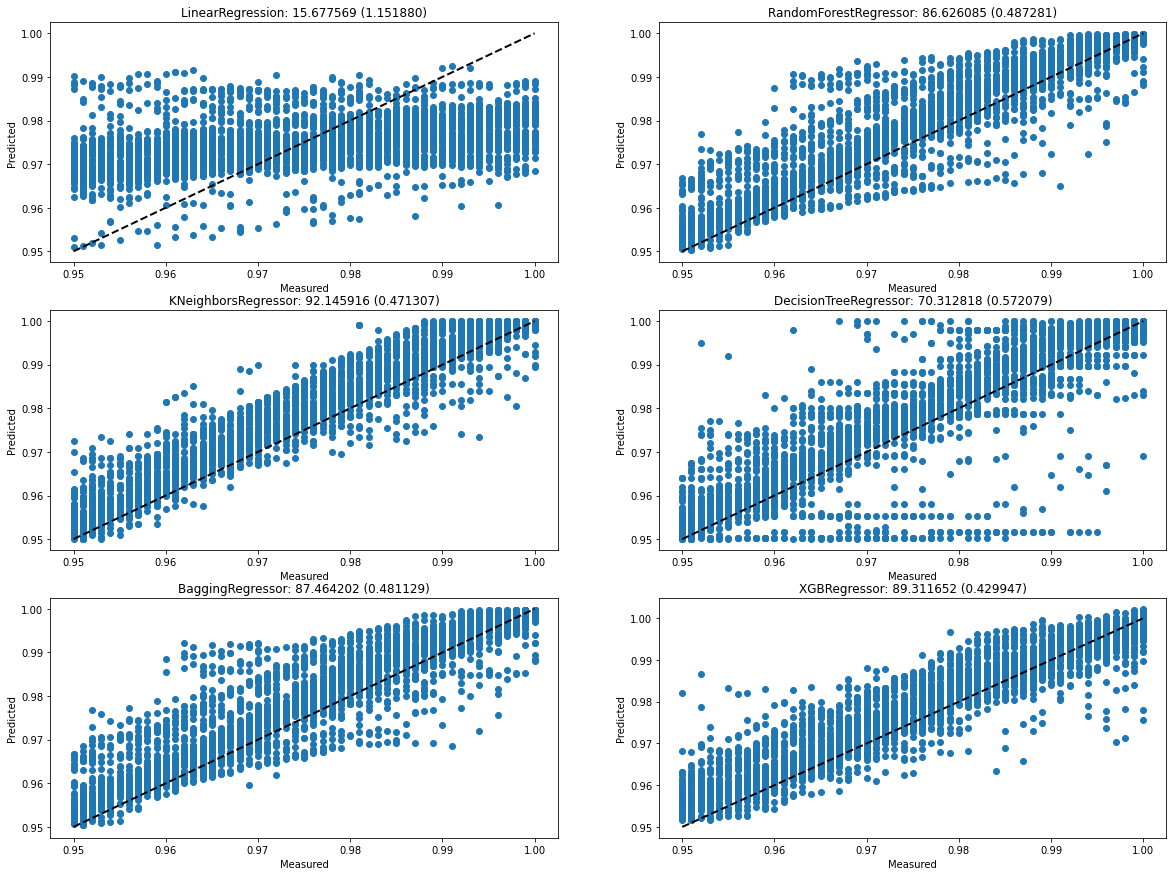

In [ ]:
result_summary_list = runregressors(navel_pca_X, y_train_c, navel_pca_test_X, y_test_c)

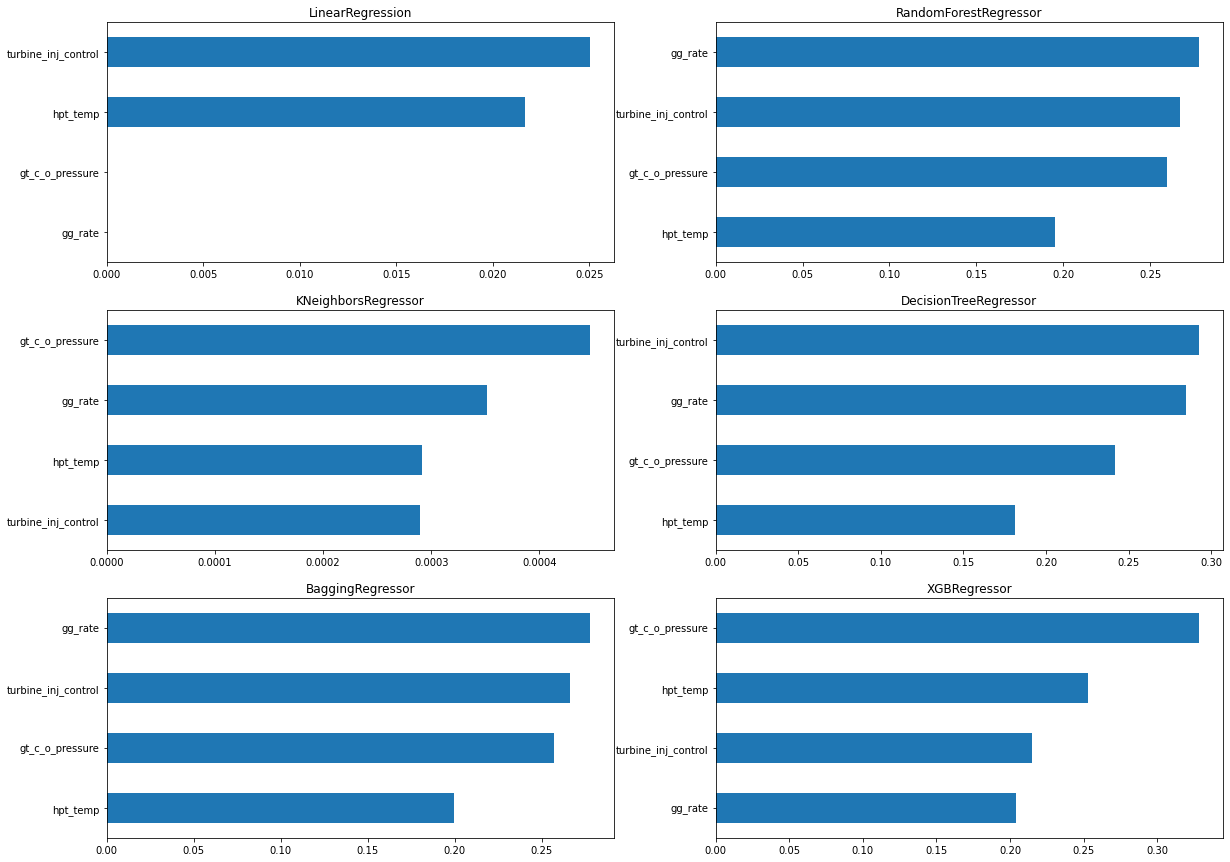

In [ ]:
for i in range(0,4):
    important_features_list[0][i]  = abs(important_features_list[0][i])

fig, ax = plt.subplots(nrows=3, ncols=2, figsize = (20, 15))
i_count = 0
nm = result_summary_list.name.to_list()
for imp_fea in important_features_list:
    col = i_count%2
    row = i_count//2
    imp_fea.sort_values().plot(kind = 'barh', ax = ax[row][col] )
    ax[row][col].set_title(nm[i_count])
    i_count+=1
            
plt.show()

In [ ]:
result_summary_list

,name,best_estimator,R2,MAE,MSE,explained variance score,accuracy
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.156181,0.011519,0.000185,0.156776,0.156181
1,RandomForestRegressor,"RandomForestRegressor(bootstrap=True, ccp_alph...",0.806087,0.004832,0.000042,0.868699,0.806087
2,KNeighborsRegressor,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.843396,0.004713,0.000034,0.921459,0.843396
3,DecisionTreeRegressor,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.688728,0.005638,0.000068,0.710473,0.688728
4,BaggingRegressor,"BaggingRegressor(base_estimator=None, bootstra...",0.806116,0.004874,0.000042,0.865961,0.806116
5,XGBRegressor,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.853322,0.004299,0.000032,0.893117,0.853322


### 가스터빈 부식 예측

LinearRegression: 5.712088 (0.622515)
RandomForestRegressor: 80.001759 (0.387073)
KNeighborsRegressor: 76.264028 (0.372019)
DecisionTreeRegressor: 67.044706 (0.412927)
BaggingRegressor: 79.701717 (0.387543)
[01:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:21] WARNING: /workspace/

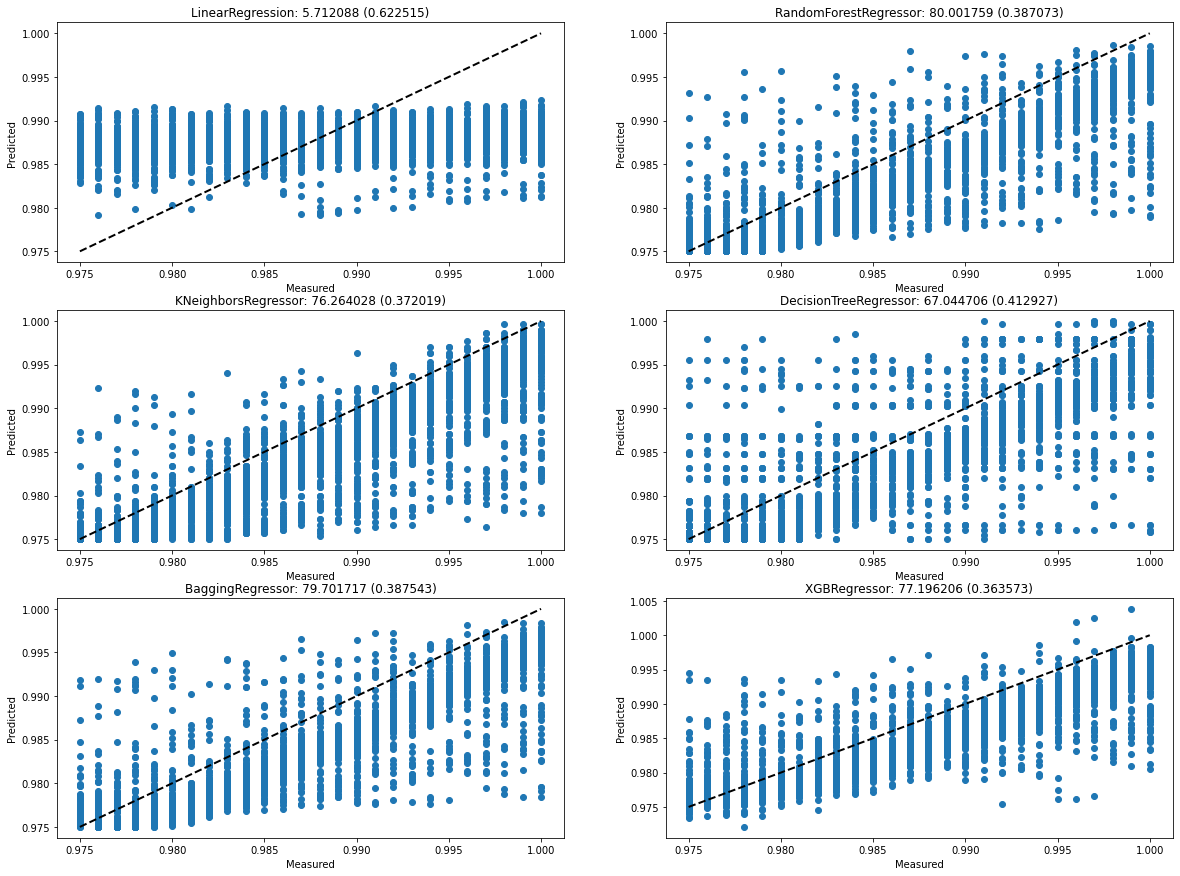

In [ ]:
result_summary_list_t= runregressors(navel_pca_X, y_train_t, navel_pca_test_X, y_test_t)

In [ ]:
result_summary_list_t

,name,best_estimator,R2,MAE,MSE,explained variance score,accuracy
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.057081,0.006225,0.000053,0.057121,0.057081
1,RandomForestRegressor,"RandomForestRegressor(bootstrap=True, ccp_alph...",0.613190,0.003871,0.000022,0.800018,0.613190
2,KNeighborsRegressor,"KNeighborsRegressor(algorithm='auto', leaf_siz...",0.570676,0.003720,0.000024,0.762640,0.570676
3,DecisionTreeRegressor,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.531019,0.004129,0.000026,0.670447,0.531019
4,BaggingRegressor,"BaggingRegressor(base_estimator=None, bootstra...",0.611234,0.003875,0.000022,0.797017,0.611234
5,XGBRegressor,"XGBRegressor(base_score=0.5, booster='gbtree',...",0.643168,0.003636,0.000020,0.771962,0.643168
